# Importing Libraries and Packages

In [1]:
# Base
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# EDA
import missingno as msno

# Visualisation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree

# Text-Based Analyses
import gensim.downloader
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity

# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Voting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Classifiers
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                
from sklearn.linear_model import SGDClassifier                                      
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                        
from sklearn.ensemble import AdaBoostClassifier 

# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch  

# Scalers and Transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline                                               
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score  

In [2]:
# Set Seed
SEED = 50

# Importing Data

In [3]:
# Import data
path = "data/kickstarter_projects.csv"

df_kickstarter = pd.read_csv(path)
df_kickstarter.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [4]:
# Converting dates to datetime objects
df_kickstarter['Launched'] = pd.to_datetime(df_kickstarter['Launched'], format='%Y-%m-%d %H:%M:%S')
df_kickstarter['Deadline'] = pd.to_datetime(df_kickstarter['Deadline'], format='%Y-%m-%d')

# EDA

#### Data Overview

In [5]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [6]:
df_kickstarter.describe()

,ID,Launched,Deadline,Goal,Pledged,Backers
count,3.748530e+05,374853,374853,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,2014-09-26 12:22:30.728664320,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359
min,5.971000e+03,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2013-04-30 22:06:24,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,2014-12-02 19:02:35,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,2016-03-29 19:50:49,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,2018-01-02 15:02:31,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000
std,6.191377e+08,NaN,NaN,1.158778e+06,9.132054e+04,911.718520


Suspect right-skewed distributions for Goal, Pledged, and Backers.

In [7]:
# Check for duplicates
df_kickstarter.duplicated().sum()

0

# Visualizations and Data Cleaning

#### Numerical feature distribution

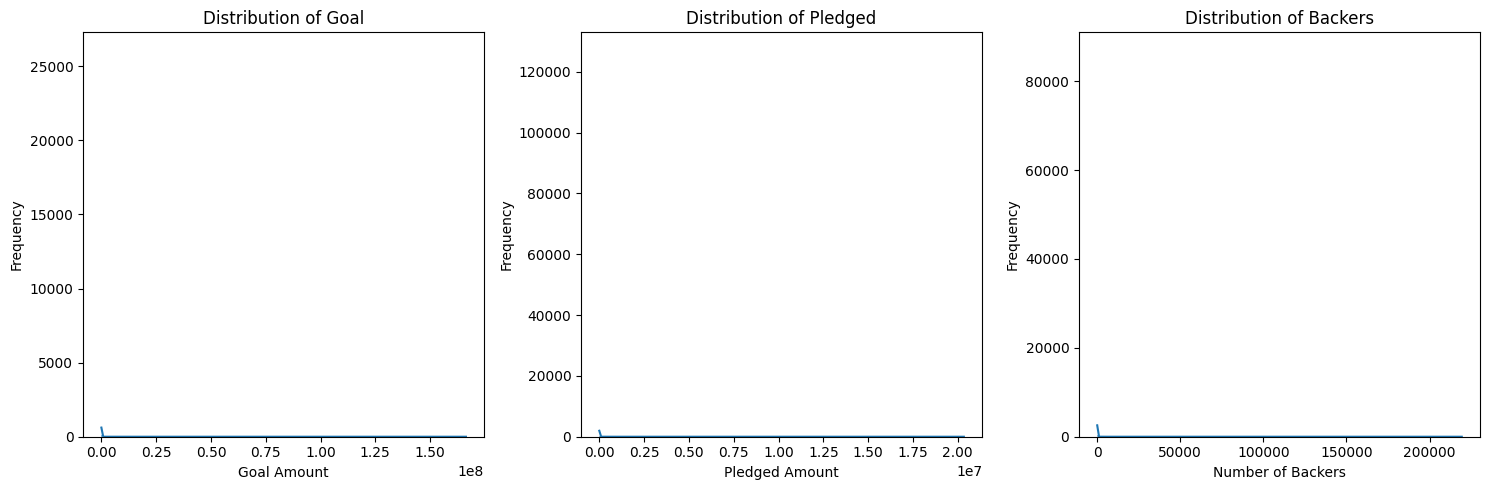

In [8]:
# Plotting Histograms of numeric columns Goal, Pledged, Backers
# WARNING: Running this takes forever
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['Goal'], kde=True)
plt.title('Distribution of Goal')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['Pledged'], kde=True)
plt.title('Distribution of Pledged')
plt.xlabel('Pledged Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['Backers'], kde=True)
plt.title('Distribution of Backers')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
# Log transform the numerical columns. Handle potential errors from log(0)
def log_transform(x):
    return np.log1p(x)

df_kickstarter['log_Goal'] = log_transform(df_kickstarter['Goal'])
df_kickstarter['log_Pledged'] = log_transform(df_kickstarter['Pledged'])
df_kickstarter['log_Backers'] = log_transform(df_kickstarter['Backers'])

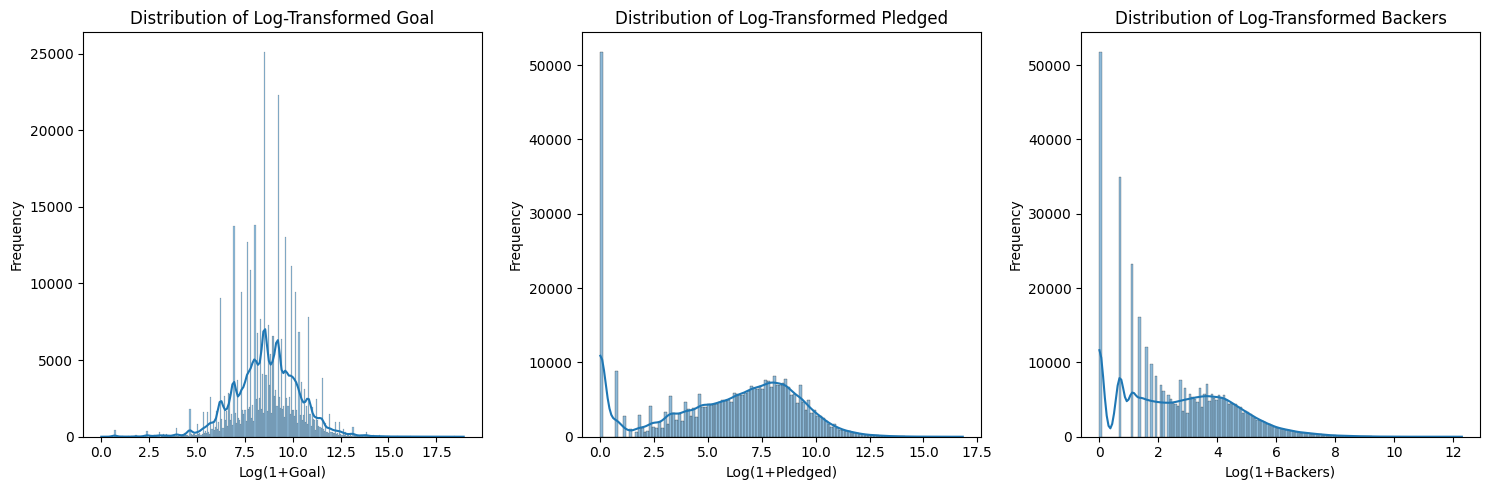

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['log_Goal'], kde=True)
plt.title('Distribution of Log-Transformed Goal')
plt.xlabel('Log(1+Goal)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['log_Pledged'], kde=True)
plt.title('Distribution of Log-Transformed Pledged')
plt.xlabel('Log(1+Pledged)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['log_Backers'], kde=True)
plt.title('Distribution of Log-Transformed Backers')
plt.xlabel('Log(1+Backers)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

log-transformed distributions look much better and more interpretable. Some observations:
- left peaks near zero: log-Pledged and log-Backers have sharp peak near 0 (very small or no funding/backers)
- distribution shapes: log-goal appears roughly symmetrical after transformation, indicating most projects have mid-range funding goals 

#### Correlation Analysis

In [10]:
# Select numerical columns for correlation analysis
numerical_cols = ['Goal', 'Pledged', 'Backers', 'log_Goal', 'log_Pledged', 'log_Backers']

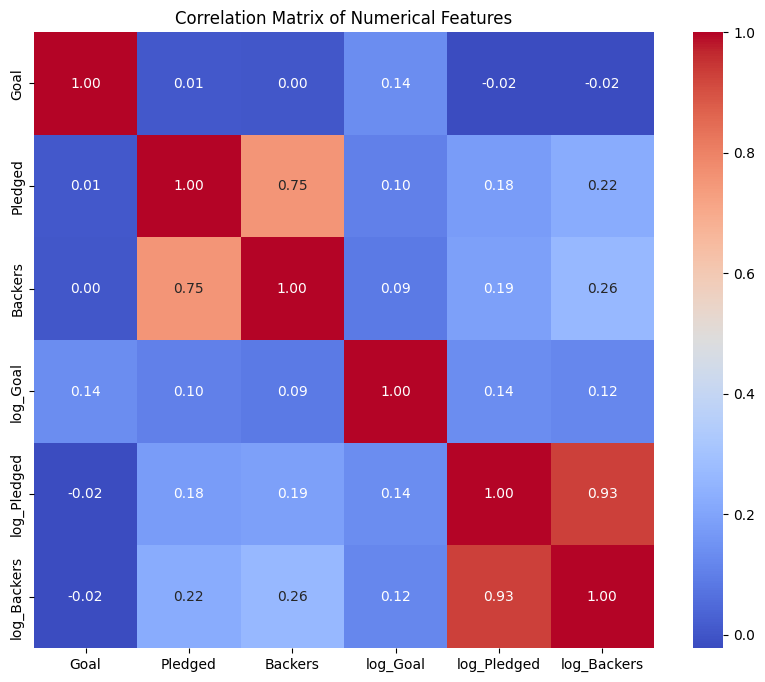

In [11]:
# Calculate and plot Correlation matrix
correlation_matrix = df_kickstarter[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

High correlation between 'Pledged' and 'Backers' bzw. 'log_Pledged' and 'log_Backers' - potentially problematic. Options to handle:
- drop 1 feature, keep the other
- combine them into a new feature that captures the information from both variables, e.g. 'Pledge_per_Backer' (Ratio to analyze funding efficiency)
- PCA to reduce multicollinearity and create uncorrelated components from highly correlated features
- algorithm-specific solutions: dtrees, xgb don't mind correlated features

#### Relationships with the Target Variable

In [12]:
df_kickstarter['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [13]:
# Filter for successful/failed campaigns and convert to binary
df_kickstarter_filtered = df_kickstarter[df_kickstarter['State'].isin(['Successful', 'Failed'])]
df_kickstarter_filtered['State_num'] = df_kickstarter_filtered['State'].map({'Successful': 1, 'Failed': 0})

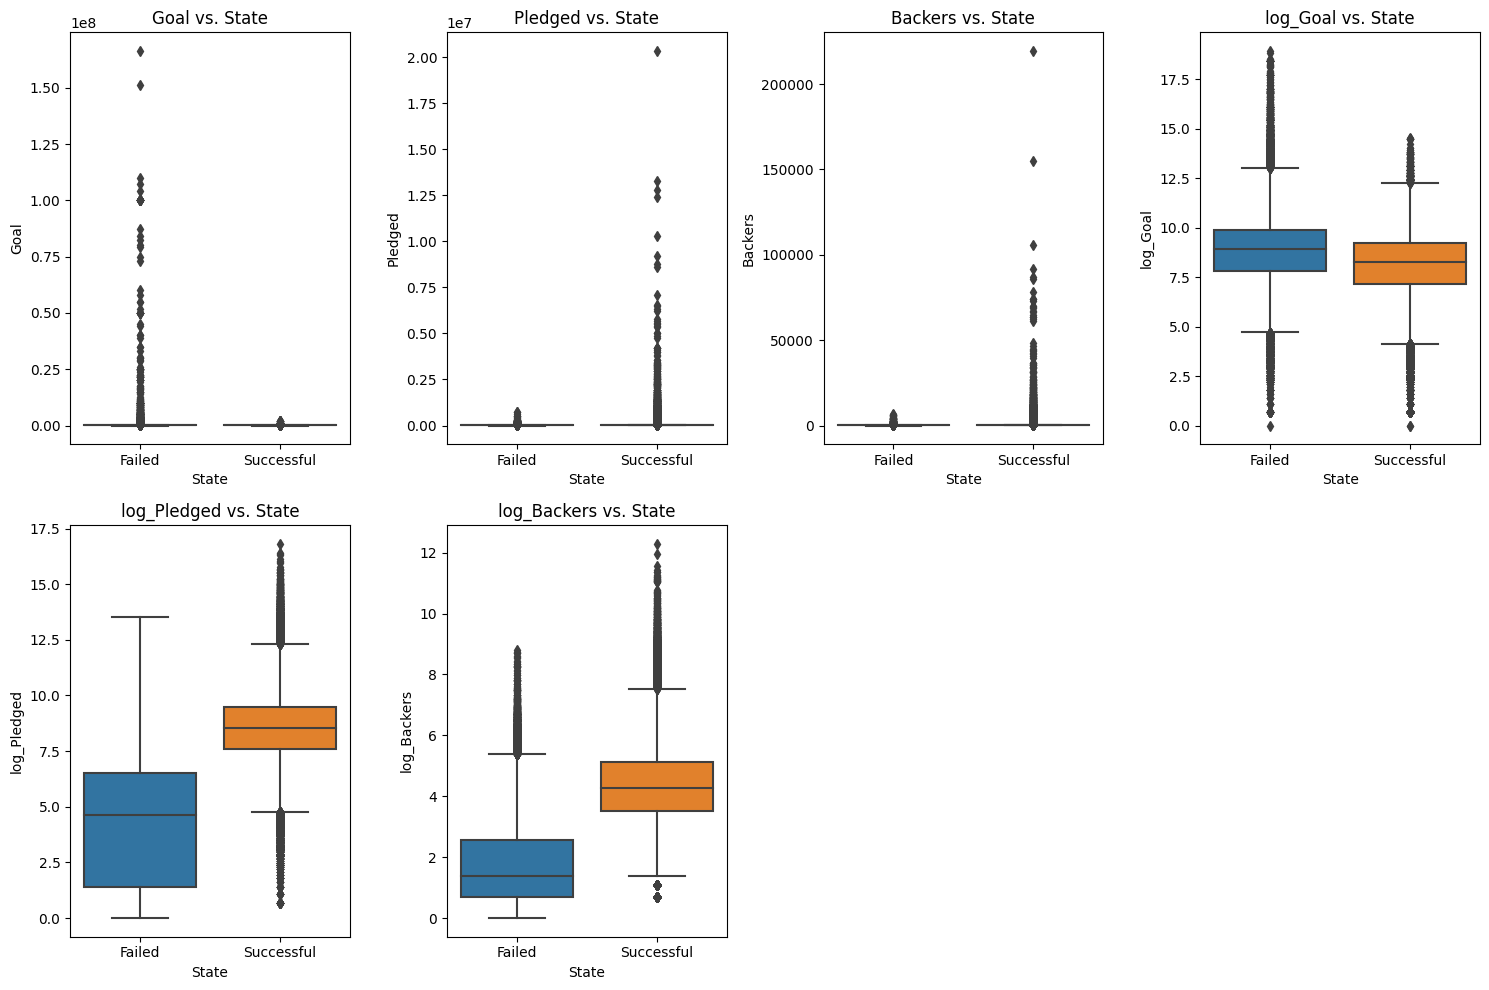

In [14]:
# Create box plots to compare distributions for successful vs. unsuccessful projects
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)  # Adjust subplot layout if you have more features
    sns.boxplot(x='State', y=col, data=df_kickstarter_filtered)
    plt.title(f'{col} vs. State')

plt.tight_layout()
plt.show()


In [15]:
# Summary Statistics:
summary_stats = df_kickstarter_filtered.groupby('State')[numerical_cols].agg(['mean', 'median'])
print(summary_stats)

                    Goal               Pledged             Backers          
                    mean  median          mean  median        mean median   
State                                                                       
Failed      63189.223940  7500.0   1321.105434   100.0   16.431236    3.0  \
Successful   9535.703177  3840.0  22664.492249  5109.0  264.128397   71.0   

            log_Goal           log_Pledged           log_Backers            
                mean    median        mean    median        mean    median  
State                                                                       
Failed      8.891018  8.922792    4.219971  4.615121    1.682344  1.386294  
Successful  8.127745  8.253488    8.555972  8.538955    4.392724  4.276666  


#### Distribution of the Target Variable

In [ ]:
# TO DO


# Feature engineering

In [16]:
# Temporal patterns
df_kickstarter_filtered['ProjectDuration'] = (df_kickstarter_filtered['Deadline'] - df_kickstarter['Launched']).dt.days
df_kickstarter_filtered['LaunchYear'] = df_kickstarter_filtered['Launched'].dt.year
df_kickstarter_filtered['LaunchMonth'] = df_kickstarter_filtered['Launched'].dt.month
df_kickstarter_filtered['LaunchDay'] = df_kickstarter_filtered['Launched'].dt.day
df_kickstarter_filtered['DayOfWeek'] = df_kickstarter_filtered['Launched'].dt.dayofweek #0=Monday, 6=Sunday

In [17]:
# Percentage funded, handle 0 cases
def calculate_percentage_funded(row):
    if row['Goal'] == 0:
        if row['Pledged'] > 0:
            return 100  # 100% if Goal is 0 and Pledged > 0
        else:
            return 0    # 0% if Goal and Pledged are 0
    else:
        return (row['Pledged'] / row['Goal']) * 100

In [18]:
# Apply function
df_kickstarter_filtered['PercentageFunded'] = df_kickstarter_filtered.apply(calculate_percentage_funded, axis=1)

In [19]:
# Backers per Dollar pledged, handle 0 cases
def calculate_backers_per_dollar(row):
    if row['Pledged'] == 0:
        return 0 #Handle division by zero
    else:
        return row['Backers'] / row['Pledged']

In [20]:
# Apply function
df_kickstarter_filtered['BackersPerDollar'] = df_kickstarter_filtered.apply(calculate_backers_per_dollar, axis=1)

In [21]:
# Check new features
print(df_kickstarter_filtered[['Goal', 'Pledged', 'Backers', 'PercentageFunded', 'BackersPerDollar']].head())

    Goal  Pledged  Backers  PercentageFunded  BackersPerDollar
0   1000      625       30         62.500000          0.048000
1  80000       22        3          0.027500          0.136364
2     20       35        3        175.000000          0.085714
3     99      145       25        146.464646          0.172414
4   1900      387       10         20.368421          0.025840


# One-hot Encoding categorical features

In [22]:
# Categorical columns
categorical_cols = ['Category', 'Subcategory', 'Country', 'DayOfWeek', 'LaunchMonth', 'LaunchYear']

In [23]:
# Create column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough' #keep other columns as they are
)

In [24]:
# Apply the one-hot encoding
encoded_data = ct.fit_transform(df_kickstarter_filtered)

In [25]:
#Convert back to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())

In [26]:
#Verification: Check the shape of the DataFrame
print("Original DataFrame shape:", df_kickstarter_filtered.shape)
print("Encoded DataFrame shape:", encoded_df.shape)

Original DataFrame shape: (331462, 22)
Encoded DataFrame shape: (331462, 240)


# Text-Based Analysis

In [27]:
encoded_df['Name'].value_counts()

KeyError: 'Name'

In [24]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vanessaroth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanessaroth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Preprocess text: remove punctuation, convert to lowercase, remove stopwords
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

In [ ]:
# Apply preprocessing to 'Name' column
encoded_df['cleaned_name'] = encoded_df['Name'].apply(preprocess_text)

In [27]:
# Load GloVe embeddings in batches
glove_file = 'data/glove.6B.50d.txt'
glove_model = {}

with open(glove_file, 'r', encoding='utf-8') as f: #Open the file
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=float) #Convert vector string parts to floats
        glove_model[word] = vector #Store the word and vector in the dictionary

print(f"GloVe model '{glove_file}' loaded successfully (in batches).")

GloVe model 'data/glove.6B.50d.txt' loaded successfully (in batches).


In [ ]:
# Use glove_model dictionary to create document vectors
def create_document_vector(title, glove_model):
    words = title.split()
    vectors = []
    for word in words:
        if word in glove_model: #Check if the word is actually in the dict
            vectors.append(glove_model[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(50) #50 because we use the 50-dimensional GloVe embeddings

In [ ]:
# Apply function
encoded_df['glove_vector'] = encoded_df['cleaned_name'].apply(lambda x: create_document_vector(x, glove_model))

In [ ]:
# Check and verify embedding
print(encoded_df[['cleaned_name', 'glove_vector']].head())

                          cleaned_name   
0  grace jone give f tshirt limit edit  \
1           crystal antler untitl movi   
2                          draw dollar   
3           offlin wikipedia iphon app   
4                            pantshirt   

                                        glove_vector  
0  [-0.3222083333333333, 0.2537066666666667, 0.23...  
1  [0.018195000000000003, 0.5830099999999999, -0....  
2  [0.071995, 0.270575, 0.322445, -0.053245, 0.11...  
3  [0.027579999999999993, -0.368622, 0.9563200000...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [ ]:
# Zero vector analysis 
def is_zero_vector(vector):
    return all(v == 0 for v in vector)

zero_vector_count = encoded_df['glove_vector'].apply(is_zero_vector).sum()
total_vectors = len(encoded_df)
zero_vector_percentage = (zero_vector_count / total_vectors) * 100

print(f"Number of zero vectors: {zero_vector_count}/{total_vectors}")
print(f"Percentage of zero vectors: {zero_vector_percentage:.2f}%")

Number of zero vectors: 15886/331462
Percentage of zero vectors: 4.79%


In [ ]:
# Quality Control: Cosine Similarity Analysis
def calculate_cosine_similarity(title1, title2, glove_model):
    vec1 = create_document_vector(title1, glove_model)
    vec2 = create_document_vector(title2, glove_model)
    similarity = cosine_similarity([vec1], [vec2])[0][0]  #Get the single similarity score
    return similarity

In [ ]:
# Cluster to find similar project names
glove_matrix = np.array(encoded_df['glove_vector'].tolist())

# Scale the data (important for KMeans)
scaler = StandardScaler()
glove_matrix_scaled = scaler.fit_transform(glove_matrix)

# Choose the number of clusters (k) – experiment to find a good value
k = 10  #Start with a small number and experiment. You can use the elbow method to determine k.
kmeans = KMeans(n_clusters=k, random_state=42) #setting random state for reproducibility.
kmeans.fit(glove_matrix_scaled)

encoded_df['cluster'] = kmeans.labels_

# Find similar titles within the same cluster.
for i in range(k):
    cluster_df = encoded_df[encoded_df['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_df[['Name', 'cleaned_name']].head()) #Show top few titles in each cluster

Cluster 0:
                                                 Name   
9   Sponsor Dereck Blackburn (Lostwars) Artist in ...  \
15  You Are Among Friends: a book for the little s...   
42                             Hand made guitar picks   
48                                      Mr. Squiggles   
66  Jay Bennett's "Whatever Happened I Apologize" ...   

                                         cleaned_name  
9   sponsor dereck blackburn lostwar artist resid ...  
15               among friend book littl sister never  
42                              hand made guitar pick  
48                                         mr squiggl  
66             jay bennett whatev happen apolog vinyl  
Cluster 1:
                                                 Name   
1                      CRYSTAL ANTLERS UNTITLED MOVIE  \
24                                As The Dust Settles   
39                 Fruit Slinger: From farm to market   
51                      goopymart: chimples plush toy   
56  Choose You

In [38]:
# Pick example pairs for cosine similarity analysis. 
# Strategy: similar pairs (within-cluster), dissimilar pairs (between-clusters), and edge cases (diverse titles)
example_pairs = [
    # similar pairs within clusters
    ("offlin wikipedia iphon app", "icon iphon app"), #Cluster 3
    ("crystal antler untitl movi", "might becom movi"), #Cluster 1 and 7 - interesting
    ("hand made guitar pick", "new kitchen tool"), #Cluster 0 and 2 - dissimilar
    
    # dissimilar pairs between clusters
    ("offlin wikipedia iphon app", "hand made guitar pick"),
    ("web site short horror film", "mr squiggl"),
    ("logic guess pictur 2nd horror movi ", "kicey iceland")
]

In [39]:
for example_pair in example_pairs:
    similarity = calculate_cosine_similarity(example_pair[0], example_pair[1], glove_model)
    print(f"Cosine similarity between '{example_pair[0]}' and '{example_pair[1]}': {similarity:.3f}")

Cosine similarity between 'offlin wikipedia iphon app' and 'icon iphon app': 0.774
Cosine similarity between 'crystal antler untitl movi' and 'might becom movi': 0.127
Cosine similarity between 'hand made guitar pick' and 'new kitchen tool': 0.732
Cosine similarity between 'offlin wikipedia iphon app' and 'hand made guitar pick': 0.187
Cosine similarity between 'web site short horror film' and 'mr squiggl': 0.273
Cosine similarity between 'logic guess pictur 2nd horror movi ' and 'kicey iceland': 0.020


#### Summary Interpretation:
- GloVe embedding seems reasonably effective in capturing semantic relationships, particularly for closely related titles
- however: 'hand made guitar pick' and 'new kitchen tool' share high similarity as well - maybe due to limitations of the GloVe model (trained on general corpus of words, not specifically project titles)

## Splitting data for testing 

## Trainining the model